# QMUL SBM PHD Python Workshop - Part 3

In this session, we will continue with functions and then Numpy and Pandas packages for numerical operations and working with tabular data, respectively. 

## Functions
Functions are crucial building blocks of programming, which eliminate redundancy and provide abstraction. If you repeat a certain code that solves a non-trivial task in different parts of your code, it is a good indication that you should introduce a function. Organizing your blocks of code into functions provides an abstraction, which makes it easier to understand your code. Furthermore, the maintenance of code is easier with functions. We have so far used several built-in functions, e.g. `print` function, or functions from other packages such as Numpy, e.g. `np.sqrt()`. The functions are called by providing their arguments, lists of which can be checked from the help.

We can also define our own functions. Let's now define a simple function. **Positional arguments** must always be provided inputs. Default values are used for **keyword arguments** if no value is provided. The function definition syntax is as follows:

```python
def function_name(arg1, arg2 = val2):
    code
    return value
```

### Namespaces
The local namespace (variable scope) is created when the function is called and the arguments are automatically loaded. You can also use variables from the global namespace in the local namespace. However, you cannot change their values. If you try, a new variable is created. You must use the `global` keyword if you want to update its value.

As an example, let's write a function that cleans the names of subject areas.

In [1]:
import re #regular expressions library for handling text

courses = [' accounting ', 'finance ', 'Marketing ', 'supply chain management#', 
           '?interna92tional BuSiness1\n']

# Create a list of characters to remove
remove_chars = '[_!#?*0-9]'

def clean_name(name):
    cl_name = name.strip() #remove the beginning and ending white spaces and new lines
    cl_name = re.sub(remove_chars, '', cl_name) #remove irrelevant characters
    cl_name = cl_name.title() #first letter capital 
    return cl_name

# Write a list comprehension that applies clean_name to each name in the courses list
cleaned_courses = [clean_name(course) for course in courses]
cleaned_courses

['Accounting',
 'Finance',
 'Marketing',
 'Supply Chain Management',
 'International Business']

Final check about variable scope:

In [2]:
# What happens if you try accessing cl_name outside the function (in the global scope), 
# where it is not in the namespace?
cl_name

NameError: name 'cl_name' is not defined

Since in Python everything is an object, the variables are passed by object (reference), in contrast to passing by value, which is common in most other languages. The behaviour depends on whether the argument is of mutable vs immutable data type, similar to the behaviour of variable assignment as we have seen before. The following exercises illustrate variable scopes and the behaviour for mutable and immutable arguments.

In [3]:
# Try the following code - Version 1
def clean_name(name):
    name = name.strip() 
    name = re.sub(remove_chars, '', name) 
    name = name.title()
    return name

name1 = "?businesS analytics#"
name2 = clean_name(name1)

# What output do you expect and why?
print(name1, name2)

?businesS analytics# Business Analytics


In [4]:
# Try the following code - Version 2
def clean_name_alt(name):
    name1 = name.strip() 
    name1 = re.sub(remove_chars, '', name1) 
    name1 = name1.title() #first letter capital 
    return name1

name1 = "something else"
name2 = "?businesS analytics#"
name3 = clean_name_alt(name2)

# What output do you expect and why?
print(name1, name2, name3)

something else ?businesS analytics# Business Analytics


In [5]:
# Try the following code - Version 3
def clean_name_alt(name):
    # set the scope of the variable to global
    global name1 
    name1 = name.strip() 
    name1 = re.sub(remove_chars, '', name1) 
    name1 = name1.title() #first letter capital 
    return name1

name1 = "something else"
name2 = "?businesS analytics#"
name3 = clean_name_alt(name2)

# What output do you expect and why?
print(name1, name2, name3)

Business Analytics ?businesS analytics# Business Analytics


In [6]:
# Check whether name1 and name3 are the same object
name1 is name3

True

In [7]:
# Working with list arguments

# Global scope:
courses = [' accounting ', 'finance ', 'Marketing ', 'supply chain management#', 
           '?interna92tional BuSiness1\n']
no_courses = 0

def clean_names(name_list):
    # set the scope to global
    global no_courses
    # loop over the list by both index and value
    for ind, name in enumerate(name_list):
        # increment no_courses
        no_courses += 1
        # call clean_name function and update the list
        name_list[ind] = clean_name(name)        

# clean the courses list
clean_names(courses)

# What output do you expect and why?
print(courses, no_courses)

['Accounting', 'Finance', 'Marketing', 'Supply Chain Management', 'International Business'] 5


## Numpy Package
NumPy is the main package for numerical computations in Python. It is used together with the Pandas package for data analysis. Numpy is highly efficient even for large amounts of data because its methods are implemented in C. NumPy provides methods, operations, and functions that can be applied to whole arrays without the need for loops or list comprehensions.

### Numpy Arrays
The core data structure of Numpy is `ndarray` (N-dimensional array). Arrays are homogeneous, meaning that all units have the same data type (mostly numeric and logical), differently from lists that are heterogeneous. With arrays, you can apply operations as if they were scalars. 

In [8]:
# Import the numpy package
import numpy as np

# Set the seed for random numbers
np.random.seed(34)

# Create my_array 2 x 3 array of standard normal variables
my_array = np.random.standard_normal((2, 3)) 
my_array

array([[ 0.2438351 , -0.74731818, -1.56117699],
       [-0.46425312, -0.35206234, -1.28149188]])

All mathematical operators are applied element-wise:

In [9]:
# Multiply all entries of my_array by 10
10 * my_array

array([[  2.43835101,  -7.47318182, -15.61176995],
       [ -4.64253122,  -3.52062344, -12.81491877]])

In [10]:
# Subtract 0.2*my_array from my_array
my_array - 0.2 * my_array

array([[ 0.19506808, -0.59785455, -1.2489416 ],
       [-0.3714025 , -0.28164988, -1.0251935 ]])

In [11]:
# Divide 10 by each entry of my_array
10 / my_array

array([[ 41.01132271, -13.3811812 ,  -6.40542362],
       [-21.53997363, -28.40406016,  -7.80340491]])

In [12]:
# Raise 0.2 to the power given by each entry of my_array
0.2 ** my_array

array([[ 0.67540859,  3.32930047, 12.3371797 ],
       [ 2.11105237,  1.76230478,  7.86546464]])

In [13]:
# Take the fourth power of each entry of my_array
my_array ** 4

array([[3.53496317e-03, 3.11904897e-01, 5.94030264e+00],
       [4.64535952e-02, 1.53630804e-02, 2.69689123e+00]])

You can access the shape of the array by the `shape` attribute:

In [14]:
# How many rows and columns does my array have my_array?
my_array.shape

(2, 3)

You can create arrays from other collections by using the `np.array()` function.

In [15]:
my_list = [3, 6, -2]
# Create my_array from my_list
my_array = np.array(my_list)
# Change the values of both my_list and my_array
my_list *= 4  
my_array *= 2

# What results do you expect?
print(my_list, my_array)

[3, 6, -2, 3, 6, -2, 3, 6, -2, 3, 6, -2] [ 6 12 -4]


In [16]:
my_list = [3, 6, -2]
# create a list that contains 2 * each value of my_list elements
2 * np.array(my_list)

array([ 6, 12, -4])

You can create two-dimensional arrays from lists with equal length:

In [17]:
data1 = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
# Create 2D array from data1
arr1 = np.array(data1)
# print arr1
arr1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

A commonly used Numpy array method is `reshape((n1,n2))` which reshapes the array to a 2D array with n1 rows and n2 columns (can be applied to higher dimensional arrays). Another useful method is `ravel()`, which flattens the array

In [18]:
# range(1, 13) -> 1, 2, 3, ..., 12
# Numpy's arange is similar to the range iterator but returns an array 
arr2 = np.arange(1,13)
# Print the array
arr2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [19]:
# Reshape the array to 3x4 two-dimensional array
arr2.reshape((3, 4))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [20]:
# Reshape the array to 2 rows and assign to arr3
arr3 = arr2.reshape((2,-1))

# Flatten arr3
arr3.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

You can compare two numerical arrays to form a Boolean array.

Create two standard normally distributed 2d (2x4) arrays and check whether the entry in the first array is greater than or equal to the second array entry.

In [21]:
arr1 = np.random.standard_normal((2, 4))
arr2 = np.random.standard_normal((2, 4))
# create the boolean array that contains whether arr1 value is greater than or equal to arr2 value
arr1 >= arr2

array([[ True, False,  True, False],
       [ True, False, False,  True]])

## Indexing and Slicing Numpy Arrays
Indexing and slicing are done in a very similar way to lists and tuples. If the array is high dimensional (at least 2), you provide indices for all dimensions.

In [22]:
arr1 = np.array([3, 6, -2, 7, 9])
# The element in index 1
print(arr1[1])
# Slice that starts with the index 2 up until the end
print(arr1[2:])

6
[-2  7  9]


With Numpy arrays, you can pass multiple indices as a list:

In [23]:
# Subscript elements at index 0, 2, and 3
arr1[[0, 2, 3]]

array([ 3, -2,  7])

Working with 2D arrays:

In [24]:
arr2 = np.arange(12).reshape(4,3)
arr2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [25]:
# Subscript to the element in row 1 and column 2
arr2[1, 2]

5

In [26]:
# Dice to the sub-matrix from row 2 to the last row and columns 0 and 2 (not 1)
arr2[2:, 0::2]

array([[ 6,  8],
       [ 9, 11]])

You can then assign values to these slices. If you assign a scalar, its value is repeated for each entry.

In [27]:
# For the dice above, assign the values to 100
arr2[2:, 0::2] = 100
# Print arr2
arr2

array([[  0,   1,   2],
       [  3,   4,   5],
       [100,   7, 100],
       [100,  10, 100]])

You can also index by using logical conditions, which you can equally apply to other collections such as lists and tuples. 

In [28]:
# Data type conversion needed for the next replacement (remember homogeneous types)
arr2 = arr2.astype(np.float64)

# Identify the elements of arr2 which are greater than or equal to 7
arr2 >= 7

# Set the values >= 7 to normal random numbers with mean 10, std dev =2
arr2[arr2 >= 7] = np.random.normal(10, 2, np.sum(arr2>=7))
arr2

array([[ 0.        ,  1.        ,  2.        ],
       [ 3.        ,  4.        ,  5.        ],
       [ 9.9974274 , 12.52209386,  9.627352  ],
       [12.85985544,  8.41779605,  9.40452156]])

## Numpy functions
Numpy provides a wide range of functions and methods that can be applied efficiently on arrays.  

**Unary functions**:
They are all element-wise transformations.
- `abs`: Compute the absolute value
- `sqrt`: Compute the square root
- `exp`: Compute the exponential
- `log`,`log10`: Natural logarithm, log base 10
- `sign`: Compute the sign
- `rint`: Round to the nearest integer
- `isnan`: Return boolean array indicating whether each value is NaN (Not a Number)
- `cos`, `cosh`, `sin`, `sinh`, `tan`, `tanh`: Regular and hyperbolic trigonometric functions

**Binary functions:**
They take two arrays and return a single array as the result. 
- `maximum`: Element-wise maximum
- `minimum`: Element-wise minimum
- `mod`: Element-wise modulus

In [29]:
# Create an array of 0, 1, ...,9
arr1 = np.arange(0, 10)
# Exponentiate that array elementwise
print(np.exp(arr1))

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


Create two standard normal 2d (2x2) arrays and choose the maximum of the two arrays for each element

In [30]:
arr1 = np.random.standard_normal((2, 2))
arr2 = np.random.standard_normal((2, 2))
# Create arr3, which is elementwise maximum of the two
arr3 = np.maximum(arr1, arr2)
# Print arr1, arr2, arr3
print(arr1, arr2, arr3, sep ='\n')

[[ 0.9619496  -1.07044067]
 [-1.20546821  0.64403071]]
[[ 0.05692216  1.41854611]
 [-1.14294482  0.21581955]]
[[ 0.9619496   1.41854611]
 [-1.14294482  0.64403071]]


In [31]:
arr = np.arange(12).reshape(4,3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [32]:
# Overall mean, sum, standard deviation
arr.mean(), arr.sum(), arr.std()

(5.5, 66, 3.452052529534663)

In [33]:
# Mean across the rows
arr.mean(axis=0)

array([4.5, 5.5, 6.5])

In [34]:
# Maximum across the columns
arr.max(axis=1) 

array([ 2,  5,  8, 11])

## Working with Tabular Data: Pandas
We will now learn the basics of Pandas, the Python package for working with tabular data, and start working on data pre-processing.

Consider that you have just started working as an analyst at a film production company and your job involves analysing the market trends in the filming industry. As a data source on individual firms and audience preferences, you start your analysis by downloading the datasets on IMDB https://www.imdb.com/interfaces/. Your first objective is to clean data in the individual datasets and form an integrated dataset of movies produced in the past two decades, involving Title, Genre, Year, Runtime (Minutes), IMDB Rating, and Number of Votes data by merging two datasets.

## Organising your workspace

To work with data files, we must first ensure that they are in our working directory. In the below, we change the path to the directory in which we have the data files in our local drive. For this, we can use the shell commands by importing the `os` package. The function `os.getcwd()` returns the current working directory, while `os.chdir()` changes the working directory. The `os.path` module contains functions to work with path names in a way that is robust across operating systems (Windows, MacOS, and Linux).

In [35]:
#import os
import os

# Print your current working directory
print(os.getcwd())

# assign your home address to the variable HOME. The expanduser function is used to replace ~ with the home
HOME = os.path.expanduser('~')

# Locate the folder in which you saved the data and create a path by joining them
# In my case, my HOME is "C:\Users\Guven" and my files are under 
# C:\Users\Guven\Documents\PhD workshop\
PROJECT_DIR = os.path.join(HOME, 'Documents', 'PhD workshop')

# Change to the folder in which the dataset
os.chdir(PROJECT_DIR)

# Print your current working directory
print(os.getcwd())

C:\Users\guven\Documents\PhD workshop\to be uploaded
C:\Users\guven\Documents\PhD workshop


If you are working on Google Colab, do the following after you copy the files in the designated folder on your Google Drive:

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.chdir(os.path.join(os.getcwd(), 'drive', 'My Drive', 'Colab Notebooks'))
os.listdir()

## Reading data with Pandas

The first step of data analysis is reading data from files. Pandas library provides several functions for reading data from different types of files, including comma or tab separated files. We first read the data from the `title.basics.tsv.gz` file, which includes the following data fields:  
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title.

We now read the data by the Pandas `read_csv` function, which takes the file path and `sep` (separator, which is `\t` for tab in our data that is tab-seperated). This returns a `dataframe` object which includes different observations (films) in the rows, and features in the columns. Each row is identifed by its index value very much like Python dictionaries.

In [36]:
# Import pandas library (convention: as pd)
import pandas as pd

# Read the data from title_basics into the dataframe movies_df
movies_df = pd.read_csv('title.basics.tsv.gz', sep='\t', low_memory=False)

## Data preprocessing

We shall now explore the data set. For this, we can use the `head()` and `tail()` methods of the dataframe, which display the top or bottom rows, respectively.

In [37]:
# Display the top 10 rows of movies_df
movies_df.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short"
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


The column `tconst` is the unique identifier for the record. Hence, we would like to set it as the index by the `set_index()` method. The default behaviour of Pandas objects is not to mutate the original data frame and to return a new dataframe. To overwrite the orginal dataframe, you should pass the argument `inplace=True`. Passing the argument `drop=True` leads to dropping the column used for setting the index.

In [38]:
movies_df.set_index('tconst', drop=True, inplace=True)

# print the tail (last 5)
movies_df.tail()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy"


The `info` method provides key information on the data frame, including names and types of variables, data shape (number of rows and columns), and memory. As you can see below, there are 8946058 titles recorded on IMDB.

In [39]:
# Show info about the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8946058 entries, tt0000001 to tt9916880
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   titleType       object
 1   primaryTitle    object
 2   originalTitle   object
 3   isAdult         object
 4   startYear       object
 5   endYear         object
 6   runtimeMinutes  object
 7   genres          object
dtypes: object(8)
memory usage: 614.3+ MB


We can now move to data cleaning. First, let's remove duplicate entries, if any, by the `drop_duplicates` method.

In [40]:
# What is the initial number of rows?
# Hint: you can use the shape attribute as in Numpy arrays
N1 = movies_df.shape[0]

# Drop the duplicates in-place
movies_df.drop_duplicates(inplace=True)

# Print the number of rows that have been dropped
N1 - movies_df.shape[0] 

2043868

We can obtain a view of one of the columns by using square brackets [], which keeps the association with the index and returns a Series. Since it is only a view of a part of the original dataframe, if we make any changes, it applies to the original dataframe.

In [41]:
# Return a view of the "titleType" series
movies_df['titleType']

tconst
tt0000001        short
tt0000002        short
tt0000003        short
tt0000004        short
tt0000005        short
               ...    
tt9916848    tvEpisode
tt9916850    tvEpisode
tt9916852    tvEpisode
tt9916856        short
tt9916880    tvEpisode
Name: titleType, Length: 6902190, dtype: object

Not all of the columns are relevant. Especially if you are working with big data sets, it is beneficial to drop the irrelevant variables directly. You need to identify these variables based on your research questions and initial exploration of the data set. You can use the `drop` method with the argument `axis = 1` to drop the columns, for which you pass the names. You can obtain the columns by using the `columns` attribute of the dataframe.

In [42]:
# Drop the columns ["originalTitle", "isAdult", "endYear"] 
movies_df.drop(["originalTitle", "isAdult", "endYear"], axis=1, inplace=True)

# Check the remaining columns by the columns attribute
movies_df.columns

Index(['titleType', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres'], dtype='object')

### Missing Values

We need to treat string and numerical variables separately and handle the missing values properly. As an example, we shall first check how many numeric entries the `runtimeMinutes` has. For this, you can call the `pandas.Series.str` functions (`isnumeric` to check whether it is a number).

In [43]:
# Print the number of entries 
print(movies_df.shape[0])
    
# Print the number of numeric entries of the runtimeMinutes column
print(movies_df.runtimeMinutes.str.isnumeric().sum())

6902190
2377547


The missing values in this data set are encoded as `\N`, which we replace with `None` to be properly handled by pandas. We use the `replace()` method to replace a given value with a desired value, in our case `\N` with `None`. 

Note that all variables are currently held as `object` type, which is used when there is mixed datatype and for strings. As we will see, Pandas cannot infer the correct data types in this case due to missing values being recorded as string. We want to ultimately cast to the following data types:
- 'titleType': 'string'
- 'primaryTitle': 'string'
- 'startYear': 'Int64'
- 'runtimeMinutes': 'float64'
- 'genres': 'string'

In [44]:
# Replace the missing value place holder \\N with None (missing value indicator)
movies_df.replace('\\N', np.nan, inplace=True)

We shall now check whether the numeric variables truely hold numeric entries. 

In [45]:
# Print the number of rows in the dataframe and the number of rows with numeric entries and non-numeric entries
# for the 'startYear' column
print(movies_df.shape[0],
      np.sum(movies_df['startYear'].str.isnumeric() == True), 
      np.sum(movies_df['startYear'].str.isnumeric() == False))

# for the 'runtimeMinutes' column
print(movies_df.shape[0],
      np.sum(movies_df['runtimeMinutes'].str.isnumeric() == True), 
      np.sum(movies_df['runtimeMinutes'].str.isnumeric() == False))

6902190 6383293 0
6902190 2377547 10


Since we see a mismatch in the runtimeMinutes, let's inspect the column and find the source of the problem. For this we will select the rows where the entry is not numeric passing a boolean array. If you have a dataframe `X` and you select the rows where the column `c1` satisfies a certain condition (say is negative) by `X[X['c1'] < 0]`. 

In [46]:
# print the rows of the dataframe in which the `runTimeMinutes` is not numeric
movies_df[movies_df['runtimeMinutes'].str.isnumeric() == False]

,titleType,primaryTitle,startYear,runtimeMinutes,genres
tconst,,,,,
tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,NaN,Reality-TV,NaN
tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,NaN,Talk-Show,NaN
tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,NaN,Documentary,NaN
tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,NaN,Talk-Show,NaN
tt12149332,tvEpisode,Jeopardy! College Championship Semifinal Game ...,NaN,Game-Show,NaN
tt12415330,tvEpisode,Anthony Davis High Brow Tank\tAnthony Davis Hi...,NaN,Reality-TV,NaN
tt13704268,tvEpisode,Bay of the Triffids/Doctor of Doom\tBay of the...,NaN,"Animation,Comedy,Family",NaN
tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",NaN,"Game-Show,Reality-TV",NaN
tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,NaN,Talk-Show,NaN


In [47]:
# Replace non-numeric runtimeMinutes with missing values
movies_df.loc[movies_df['runtimeMinutes'].str.isnumeric() == False, 'runtimeMinutes'] = np.nan

We are now ready to correct the data types by using the method `astype()` to which we pass a dictionary of data types. Note that we cast 'startYear' as 'float64' first and then to 'Int64' because the 'object' type can be converted to float64 but not Int64 when there are missing values. A work-around is to first convert to float64 and then to int 64.

In [48]:
# Column dataypes
column_types = {'titleType': 'string', 'primaryTitle': 'string', 'startYear': 'float32', 
                'runtimeMinutes': 'float32', 'genres': 'string'}
# Convert all data types using the dictionary
movies_df = movies_df.astype(column_types) 

# Correct the data type for startYear
movies_df['startYear'] = movies_df['startYear'].astype('Int16')

# Check the variables and data types
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6902190 entries, tt0000001 to tt9916880
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   titleType       string 
 1   primaryTitle    string 
 2   startYear       Int16  
 3   runtimeMinutes  float32
 4   genres          string 
dtypes: Int16(1), float32(1), string(3)
memory usage: 514.7+ MB


We shall now inspect missing values. You can use the `isna()` method to obtain a data frame which holds a value `True` for cells where the data is missing.

In [49]:
# Find how many missing values there are for each variable
movies_df.isna().sum(axis=0)

titleType               0
primaryTitle           10
startYear          518897
runtimeMinutes    4524643
genres             268963
dtype: int64

We have only a handful of missing values in the 'Primary Title'. We will exclude those without title.  For this, we use the `dropna()` method. You can specify when to drop, i.e. in which column when there is a missing value, by specifying the `subset` argument.

In [50]:
# Drop rows if they do not have a title
movies_df.dropna(subset=['primaryTitle'], inplace=True)

 Let's drop cells if both `runtimeMinutes` and `genres` are missing. For this, you can use the `how='all'` argument of the `dropna()` method.

In [51]:
# If both runtimeMinutes and genres are missing, drop that row
movies_df.dropna(subset=['runtimeMinutes', 'genres'], how='all', inplace=True)

# Create a new data_frame by selecting only movies (titleType = 'movie') that were produced after 2000
movies_selected_df = movies_df[(movies_df.titleType == 'movie') & (movies_df.startYear >= 2000)].copy()

We now drop the 'titleType' field, which is now always movie, hence not needed, rename the variables for convenience, and sort according to a given variable. The `rename()` method takes a dictionary as the columns arguments in the format {var1_old_name: var1_new_name, var2_old_name: var2_new_name}. We then sort the data in the ascending order of year by using the `sort_values()` method by setting the keyword argument `ascending=False`.

In [52]:
# Drop the column "titleType"
movies_selected_df.drop('titleType', axis = 1, inplace = True)

# Rename the variables
movies_selected_df.rename(columns = {'primaryTitle': 'movie', 
                            'startYear': 'year', 
                            'runtimeMinutes': 'minutes'}, 
                          inplace = True)

# sort the dataframe wrt year in-place
movies_selected_df.sort_values('year', inplace=True)

# show the head of the dataframe
movies_selected_df.head(20)

,movie,year,minutes,genres
tconst,,,,
tt0265180,Expecting Mercy,2000,82.0,Thriller
tt0424986,The Headmaster,2000,120.0,Comedy
tt0263971,The Scarecrow,2000,81.0,"Animation,Family,Fantasy"
tt0263963,By Player,2000,126.0,"Drama,Romance"
tt0263957,The Iron Ladies,2000,104.0,"Comedy,Drama,Sport"
tt4060410,Aizome Kyôko: G no kaikan,2000,59.0,<NA>
tt0263926,Red Deer,2000,104.0,Drama
tt0263916,The Little Prince's Rap Against the Wicked Souls,2000,75.0,Documentary
tt0263905,Protection,2000,77.0,Drama


We can now impute the `minutes` by the median `minutes`. For this, we can use the `fillna()` method with the median as the positional argument.

In [53]:
# Impute any missing values in the minutes column by its median
movies_selected_df['minutes'] = movies_selected_df.minutes.fillna(movies_selected_df.minutes.median())

# show the head of the dataframe
movies_selected_df.head()

,movie,year,minutes,genres
tconst,,,,
tt0265180,Expecting Mercy,2000,82.0,Thriller
tt0424986,The Headmaster,2000,120.0,Comedy
tt0263971,The Scarecrow,2000,81.0,"Animation,Family,Fantasy"
tt0263963,By Player,2000,126.0,"Drama,Romance"
tt0263957,The Iron Ladies,2000,104.0,"Comedy,Drama,Sport"


### DataFrame Merging
We shall now merge the user ratings data with the movie dataframe. For this, we shall first read the title.ratings.tsv.gz dataset to a dataframe as we did for the first data set. Here, we will directly specify the index column, which is `tconst` as for the movie dataframe. This is done by passing the argument `index_col = 'tconst'`. We also set the data types by setting the `dtype` to corresponding data type.   

In [54]:
# Read the dataset title_ratings.tsv to a dataframe and set the index and the data types
ratings_df = pd.read_csv("title.ratings.tsv.gz", index_col = "tconst", 
                         dtype = {'averageRating': 'float64', 'numVotes': 'Int64'}, 
                         sep = '\t')

#Show top rows
ratings_df.head()

,averageRating,numVotes
tconst,,
tt0000001,5.7,1882
tt0000002,5.9,250
tt0000003,6.5,1661
tt0000004,5.8,163
tt0000005,6.2,2486


As you can see, it associates the same identifier `tconst` with the `averageRating` and `numVotes` variables.

Pandas `merge` method allows merging a dataset with another dataset. Here, we use the index `tconst` for matching the two dataframes, by setting the arguments `left_index = True` and `right_index = True`. This means that if two rows in the two datasets have the same index value, they belong to the same entity (movie). The argument `how = 'inner'` specifies that all rows of the left and right frames should match. If there are non-matching indices in either, those rows are excluded.

In [55]:
# Inner-Merge the ratings_df with movies_selected_df (key should exist in both)
final_movies_df = movies_selected_df.merge(ratings_df, how = 'inner', left_index = True, right_index = True)

# Show the head of the data frame
final_movies_df.head()

,movie,year,minutes,genres,averageRating,numVotes
tconst,,,,,,
tt0265180,Expecting Mercy,2000,82.0,Thriller,4.8,123
tt0424986,The Headmaster,2000,120.0,Comedy,7.9,3436
tt0263971,The Scarecrow,2000,81.0,"Animation,Family,Fantasy",6.3,246
tt0263963,By Player,2000,126.0,"Drama,Romance",6.9,112
tt0263957,The Iron Ladies,2000,104.0,"Comedy,Drama,Sport",6.5,1417


In [56]:
# Check the number of entries
final_movies_df.shape[0]

151816

## EDA

We shall now look at the descriptive statistics for numeric variables by using the `describe` method:

In [57]:
# Check descriptive statistics
final_movies_df.describe()

,year,minutes,averageRating,numVotes
count,151816.000000,151816.00000,151816.000000,1.518160e+05
mean,2012.576632,94.59668,6.200705,4.459080e+03
std,5.818444,180.88681,1.465686,3.768273e+04
min,2000.000000,2.00000,1.000000,5.000000e+00
25%,2008.000000,83.00000,5.300000,1.900000e+01
50%,2013.000000,90.00000,6.400000,6.800000e+01
75%,2017.000000,102.00000,7.200000,3.830000e+02
max,2022.000000,51420.00000,10.000000,2.561011e+06


There seems to be some movies with very low number of votes. Hence, we shall slice only to those movies with at least 10000 votes. We shall then have a quick look at the top 10 movies with highest `averageRating`.

In [58]:
# Choose only those movies with at least 10000 votes
final_movies_df = final_movies_df[final_movies_df.numVotes >= 10000]

# Display the top 10 movies in terms of averageRating (if equal, more votes first)
final_movies_df.sort_values(['averageRating', 'numVotes'], ascending = False).head(10)

,movie,year,minutes,genres,averageRating,numVotes
tconst,,,,,,
tt2592910,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",9.1,46033
tt0468569,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2561011
tt0167260,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",9.0,1779716
tt5354160,Mirror Game,2016,147.0,"Crime,Mystery,Thriller",9.0,25931
tt15097216,Jai Bhim,2021,164.0,"Crime,Drama,Mystery",8.9,189195
tt11989890,David Attenborough: A Life on Our Planet,2020,83.0,"Biography,Documentary",8.9,31349
tt5275892,O.J.: Made in America,2016,467.0,"Biography,Crime,Documentary",8.9,19554
tt10534500,#Home,2021,158.0,Drama,8.9,12511
tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,2272858


We look at the correlation between numerical variables by using the `corr()` method.

In [59]:
# Check the correlation coefficients 
final_movies_df.corr()

,year,minutes,averageRating,numVotes
year,1.000000,0.071305,-0.021424,-0.084298
minutes,0.071305,1.000000,0.356583,0.218919
averageRating,-0.021424,0.356583,1.000000,0.300244
numVotes,-0.084298,0.218919,0.300244,1.000000


There are some positive correlations between the number of votes, average rating, and the minutes. However, the correlation coefficient is a linear measure of assocation and it does not mean causation. We shall look at scatterplots. 

Matplotlib is the main visualisation package in Python and standard plots are directly implemented as methods of dataframes. Hence, you can call the `plot` method directly from a dataframe object. Here, we specify the plot type by `kind = 'scatter'`. We provide the x and y axes and the title of the plot.

<AxesSubplot:title={'center':'rating vs #votes'}, xlabel='numVotes', ylabel='averageRating'>

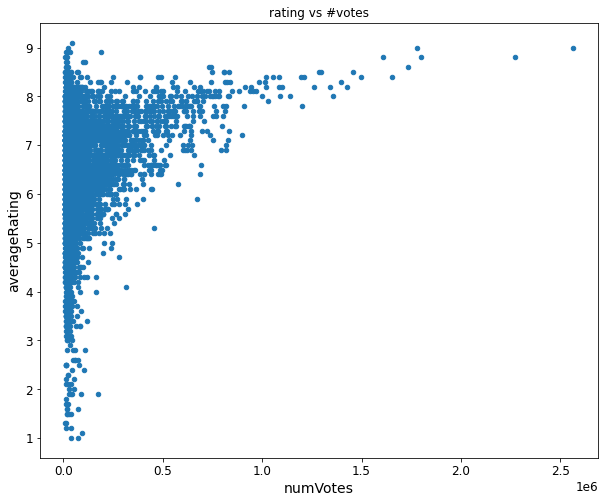

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Scatter plot between numVotes and averageRating
final_movies_df.plot(kind = 'scatter', x ='numVotes', y = 'averageRating', 
                     title ='rating vs #votes', figsize=(10,8))

We can see that the variation in averageRating decreases with numVotes, as expected since $SE(\bar{x}) = \frac{\sigma}{\sqrt{n}}$ if $n$ individual viewer ratings are independent (plausible) and randomly sampled. 

We shall now plot and inspect boxplots to see how ratings evolve over time. We can directly plot a boxplot using the `boxplot` method, specifying thecolumn for which to plot the boxplot. The optional argument `by = 'year'` specifies that we want to plot the boxplots separately for different values of the variable `year`.

<AxesSubplot:title={'center':'averageRating'}, xlabel='year'>

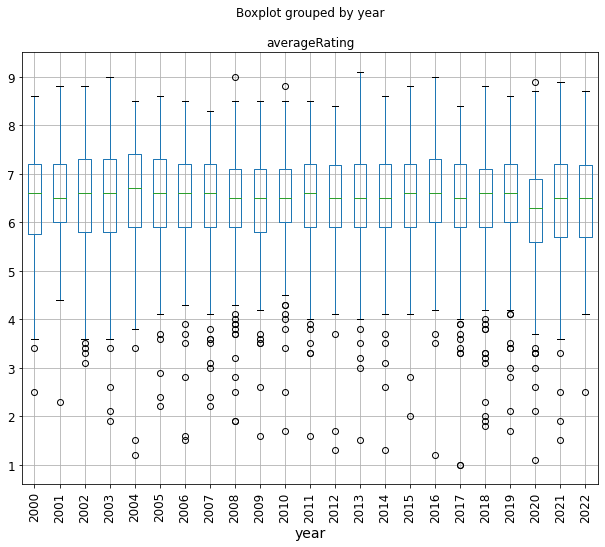

In [61]:
# Create a box plot of averageRating by year
final_movies_df.boxplot(column = 'averageRating', by = 'year', rot = 90, figsize=(10,8))

The ratings look pretty stable over time.

We shall finally look at the association between the genre and the movie rating. We must consider that each movie can belong to multiple genres. We first start by identifying the different genres. For this, we can use the `str` methods that we learned before. I copy some code below for this. Work on this on your own at home for practice.

In [62]:
# The cat method concatenates all entries in a column using the specified seperator (here ',')
genres = final_movies_df["genres"].str.cat(sep = ',') 

# This returns a long str of individual genres. To obtain a set of genres, we first
# split from ',' to a list and then remove duplicates by the set() constructor
genres = set(genres.split(','))

# The following calculates the average of ratings for each genre in the list genres.
# final_movies_df["genres"].str.contains(genre) checks if each cell contains the genre being iterated
# hence this will return a slice for the correct genre, for which we then extract
# the "averageRating" column and take its mean
avg_ratings = {genre: final_movies_df[final_movies_df["genres"].str.contains(genre)]["averageRating"].mean() 
               for genre in genres}
avg_ratings

{'Crime': 6.549925595238094,
 'Documentary': 7.4206521739130435,
 'Mystery': 6.270839064649243,
 'Horror': 5.809305210918114,
 'Musical': 6.591525423728815,
 'Sport': 6.784353741496599,
 'Animation': 6.758260869565217,
 'Action': 6.3446458923512745,
 'Music': 6.640873015873016,
 'History': 6.982995951417004,
 'Thriller': 6.252736750651607,
 'Romance': 6.456709558823529,
 'Comedy': 6.294851994851995,
 'Sci-Fi': 6.148993288590604,
 'War': 6.950458715596332,
 'Family': 6.148062015503876,
 'Adventure': 6.391889483065953,
 'Fantasy': 6.142259414225942,
 'News': 7.65,
 'Biography': 7.0646408839779005,
 'Western': 6.5451612903225795,
 'Drama': 6.747116165718928}